In [45]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import random
from torch.optim import LBFGS
from tqdm import tqdm
import scipy.io
import sys

sys.path.append("../")
sys.path.append("../..")
from util import *
from model.pinn import PINNs

# 无粘Burgers方程: u_t + u*u_x = 0
# IC:u(x, 0) = sin
# BC:u(0, t) = u(2π, t)

In [46]:
500*2/10

100.0

# 构造burgers

无粘Burgers方程: u_t + u*u_x = 0, [-1, 1]*[0, 0.5]

IC:u(x, 0) = 1, x<=0; u(x, 0) = -1, x>0

BC:u(0, t) = u(2π, t)

points:  (501, 501, 2)
u shape:  (501, 501)


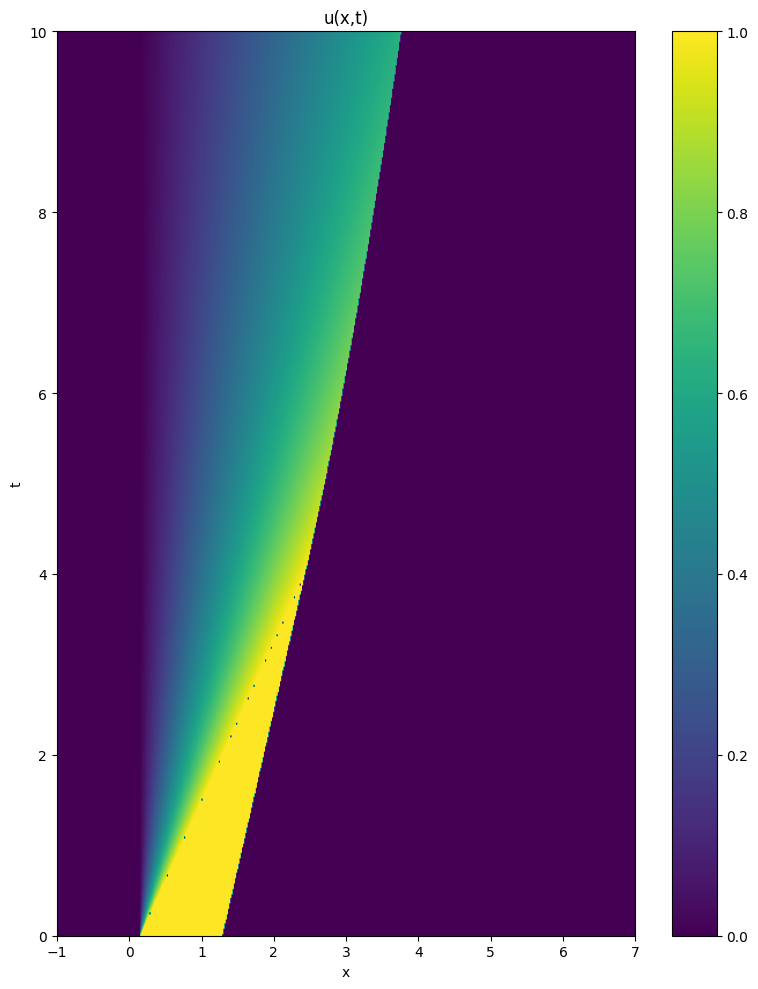

In [47]:
def get_data(x_range, y_range, x_num, y_num):
    # 在[0,X]*[0,T]区域采样
    x = np.linspace(x_range[0], x_range[1], x_num)  # [x_range0, x_range1]
    t = np.linspace(y_range[0], y_range[1], y_num)  # [y_range0, y_range1]
    x_mesh, t_mesh = np.meshgrid(x,t)
    data = np.concatenate((np.expand_dims(x_mesh, -1), np.expand_dims(t_mesh, -1)), axis=-1)

    return data

def get_burgers(x, t, c):
    if t <= 2/c:
        if x < 0:
            return 0
        elif 0 < x < c * t:
            return x / (c * t)
        elif c * t < x < 1 + c*t / 2:
            return 1
        else:
            return 0
    else:
        if 0 < x < np.sqrt(2*c*t):
            return x / (c * t)
        else:
            return 0


X_SIZE = 501
T_SIZE = 501
c = 0.5

data = get_data([-1, 6], [10, 0], X_SIZE, T_SIZE)  # (1001, 701, 2)
print('points: ', data.shape) 
# 计算解
u = np.zeros((T_SIZE, X_SIZE))
print('u shape: ', u.shape)
for i in range(X_SIZE):
    for j in range(T_SIZE):
        u[j, i] = get_burgers(data[j, i, 0], data[j, i, 1], c)



# x = data[..., 0]
# t = data[..., 1]
# print(x.shape)

# u = get_burgers(x, t)
# print(u.shape)

plt.figure(figsize=(8,10))
plt.imshow(u, extent=[-1,7,0,10], aspect='auto')
plt.xlabel('x')
plt.ylabel('t')
plt.title('u(x,t)')
plt.colorbar()
plt.tight_layout()
plt.show()

# # 定义保存的字典，键名为 'u'
data_dict = {'u': u}

# # 使用 scipy.io.savemat 保存为 .mat 文件
scipy.io.savemat('burgers_c_0.5.mat', data_dict)

(501, 501)


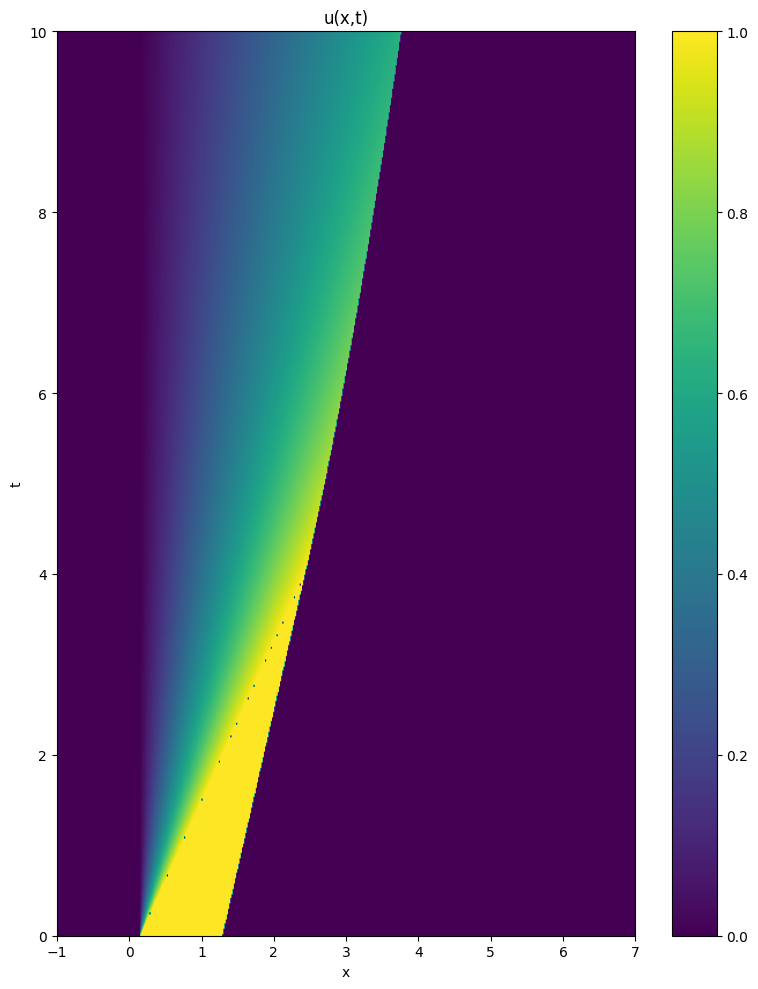

In [48]:
path = '/home/pengguohang/python_test/HCL/pinnsformer/demo/Burgers_competition/burgers_c_0.5.mat'

data = scipy.io.loadmat(path)
u = data['u']
print(u.shape)
plt.figure(figsize=(8,10))
plt.imshow(u, extent=[-1,7,0,10], aspect='auto')
plt.xlabel('x')
plt.ylabel('t')
plt.title('u(x,t)')
plt.colorbar()
plt.tight_layout()
plt.show()